## Backgammon 
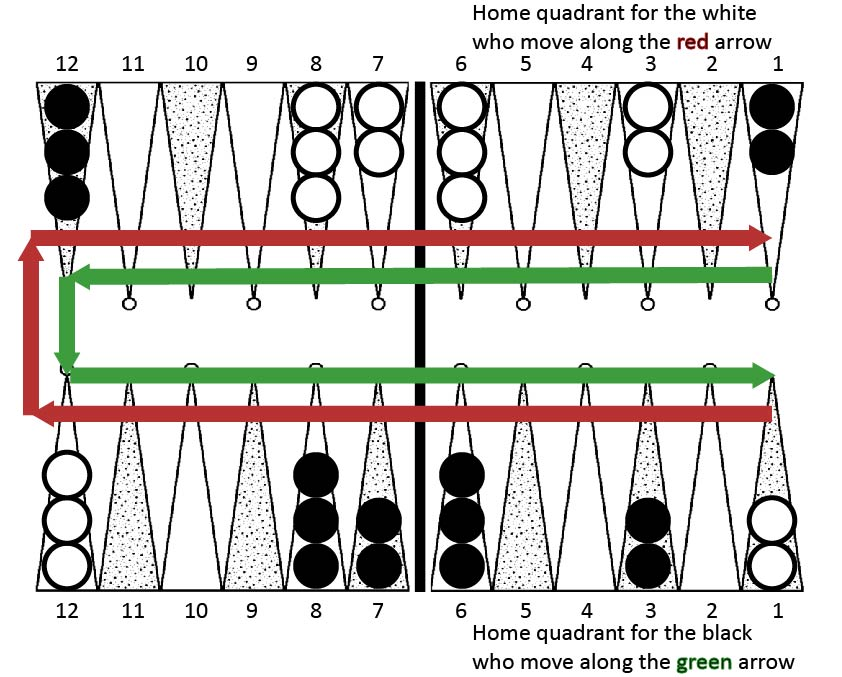

# Importar livreria usadas para o jogo

In [1]:
import numpy as np 
import random

# Função Jogador  
solicita o nome do jogador, valida que o nome ingresado contenha um minimo 3 letras, não contenha numeros, carateres especiais ou espaços   

In [2]:
def jogador():
    """
    Solicita  nome do jogador, verifica que usuario ingresse so letras e um min de 3 carateres 
    """
    nome = input('Nome do Jogador: ')
    if len(nome)<3:
        print(f' Favor ingresar um nome, nome debe conter pelomenos 3 carater')
        return jogador()  
    elif nome.isspace():
        print(f' Favor ingresar um nome, nome debe conter pelomenos 3 carater')
        return jogador()         
    elif nome.isnumeric() :
        print(f' Favor ingresar um nome, nome não pode conter carateres numericos')
        return jogador()
    elif nome.isalpha() :
        return nome
    else :
        print(f' Favor ingresar um nome, nome debe conter almenos 3 carater, nome não pode conter carateres numericos')
        return jogador()

# Objeto  Dado 
Crea o objeto dado e funçoes que o mesmo vai a usar 
## Função lançar
Solicita ao jogador se deseja lançar o dado, valida que dijite 's', 'sim', 'Sim' ou 'SIM', para lançãr o dado e genera um numero aleatrori de 1 a 6   
## função dado
Genera um numero aleatorio de 1 a 6, sem solitar interacção do jogador 

In [3]:
class Dado():
    
    def __init__(self, dado=None):
        self.dado = dado
        dado=random.randint(1,6)
        return dado
        
    def lancar():

        d = input('Lançar o dado [s]? ')
        if d == 's' or d == 'S' or d == 'sim' or d == 'Sim' or d =='SIM':
            dado = random.randint(1,6)
            return dado
        else:
            print('Para lançar o dado debe digitar sim')
            return Dado.lancar()
    
    def dado():
        dado = random.randint(1,6)
        return dado

# Objeto Tablueiro
creia o objeto tablueiro e as funçoes a utilizar  
## Função Iniciar
Gera as condicioes inicieis do tableuerio do Jogo

In [4]:
class Tabuleiro():
        
    def __init__(self, tabuleiro=None) :
        self.tabuleiro = tabuleiro
    
    def iniciar(tabuleiro=np.zeros(24)) :
        
        tabuleiro[0]=1
        tabuleiro[23]=-1
        print(tabuleiro)
        return tabuleiro    

# Objeto Jogo 
cria o o jogo como objeto e as funciones do jogo
## Função Iniciar
compara o maior lançamento de um dado para determinar quem inicia a partida 
## Função mover 
cria e avalia as reglas de movimento das peças
## Funação Fin
avalia as condiciones do jopgo e determina quando jogo finaliza 

In [5]:
class Jogo():

    def __init__(self, jogador):
        self.jogador = jogador

    def iniciar(jogador):
        
        print(f'{jogador}: ')
        dadoj = Dado.lancar() 
        dadoc = random.randint(1,6)
        print(f'{jogador} lançõu um {dadoj}')
        print(f'Computador lançou um {dadoc}')
        
        if dadoj > dadoc :
            print(f'{jogador} inicia o jogo')
            começa = jogador
            return começa
        elif dadoj < dadoc  :
            print(f'computador inicia o jogo')
            começa = 'Computador'
            return começa
        else:
            print('Empate laçar dados novamante')
            return Jogo.iniciar(jogador)
    
    def mover(turno,jogador,tabuleiro):
        
        dados = [0,0]
        
        if turno == jogador :
                               
            for d in range(2) :
                
                if tabuleiro[23] == 1:
                    print(f'{jogador} ganho, peça chego primeiro na ultima pocição')
                    return Jogo.fin(tabuleiro)
                else :
                    dados[d] = Dado.lancar()
                    print(f'{jogador} lançou um {dados[d]} no {d+1} dado')
                    
                    for i in range (0,tabuleiro.size) :
                        if i+dados[d] >= tabuleiro.size:
                            print (f'Não é possivel mover a peça da posição')
                        elif tabuleiro[i] == 1 :
                            if i+dados[d] <= tabuleiro.size :
                                if tabuleiro[i+dados[d]] == 0 :
                                    tabuleiro[i] = 0
                                    tabuleiro[i+dados[d]] = 1
                                    mov = i+1+dados[d]
                                    print(f'{jogador}, movio a peça de posiçaõ {i+1} a posiçaõ {mov}')
                                    print(tabuleiro)
                                    break
                                else :
                                    print(f'Não é possivel mover a peça da posição')
                            else :
                                print(f'Não é possivel mover a peça da posição')  

            turno = 'Computador'
            jogador = jogador
            tabuleiro = tabuleiro
            return Jogo.mover(turno,jogador,tabuleiro)
            
        if turno == 'Computador' :   
                
            for d in range(2) :
                
                if tabuleiro[0] == -1:
                    print(f'Computador ganho, peça chego primeiro na ultima pocição')
                    return Jogo.fin(tabuleiro)
               
                else : 
                    dados[d] = Dado.dado()
                    print(f'Computador lançou um {dados[d]} no {d+1} dado')
                    
                    for i in range (0,tabuleiro.size) :
                        if tabuleiro[i] == -1 :
                            if i-dados[d] >= 0 :
                                if tabuleiro[i-dados[d]] == 0 :
                                    tabuleiro[i] = 0
                                    tabuleiro[i-dados[d]] = -1
                                    mov = i+1-dados[d]
                                    print(f'Computador, movio a peça de posiçaõ {i+1} a posiçaõ {mov}')
                                    print(tabuleiro)
                                else :
                                    print(f'Não é possivel mover a peça da posição')
                            else :
                                print(f'Não é possivel mover a peça da posição')  
                            
            turno = jogador
            jogador = jogador
            tabuleiro = tabuleiro
            return Jogo.mover(turno,jogador,tabuleiro)
                                      
    def fin(tabuleiro):
        if tabuleiro[0] == -1 :
            ganador = 'Computador ganho, a peça chegou primero na ultima pocição'
            return ganador
        elif tabuleiro[23] == 1 :
            ganador = f'{jogador} ganho a peça chegou primero na ultima pocição'
            return ganador                      

## Função Jogar 
 Determina a sequencia de funçoes para jogar 

In [6]:
def jogar():
    player = jogador()
    começa = Jogo.iniciar(player)
    tabuleiro = Tabuleiro.iniciar()
    ganador = Jogo.mover(começa,player,tabuleiro)
    return ganador

executa o jogo 

In [7]:
jogar()

Nome do Jogador: Andres
Andres: 
Lançar o dado [s]? s
Andres lançõu um 6
Computador lançou um 2
Andres inicia o jogo
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.]
Lançar o dado [s]? s
Andres lançou um 1 no 1 dado
Andres, movio a peça de posiçaõ 1 a posiçaõ 2
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.]
Lançar o dado [s]? s
Andres lançou um 2 no 2 dado
Andres, movio a peça de posiçaõ 2 a posiçaõ 4
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.]
Computador lançou um 4 no 1 dado
Computador, movio a peça de posiçaõ 24 a posiçaõ 20
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -1.  0.  0.  0.  0.]
Computador lançou um 1 no 2 dado
Computador, movio a peça de posiçaõ 20 a posiçaõ 19
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  0.  0.  0.  0.  0.]
Lançar o dado [s]? s
Andre

'Computador ganho, a peça chegou primero na ultima pocição'